In [1]:
pip install opencv-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 32.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6 MB 1.6 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [3]:
import os, random, string, cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as img
import tensorflow.keras as keras
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from PIL import Image, ImageOps

Streaming output truncated to the last 5000 lines.
 extracting: sign_mnist/train/4/lmfqGtWhTF.png  
 extracting: sign_mnist/train/4/loOcwBOYmS.png  
 extracting: sign_mnist/train/4/LPIeEdHvWn.png  
 extracting: sign_mnist/train/4/lQDizHZkbc.png  
 extracting: sign_mnist/train/4/lQIbqehSPX.png  
 extracting: sign_mnist/train/4/LQXsuhVkQt.png  
 extracting: sign_mnist/train/4/LQzqmaonuZ.png  
 extracting: sign_mnist/train/4/lRLoGJiJoZ.png  
 extracting: sign_mnist/train/4/ltzXOrjQky.png  
 extracting: sign_mnist/train/4/LVGJwsrMwj.png  
 extracting: sign_mnist/train/4/lwaUyGmwqV.png  
 extracting: sign_mnist/train/4/lWKttOwnQP.png  
 extracting: sign_mnist/train/4/lWqeUzxtaQ.png  
 extracting: sign_mnist/train/4/lWzcqNmBDQ.png  
 extracting: sign_mnist/train/4/LxEnMGWaCn.png  
 extracting: sign_mnist/train/4/lxpDWvJVzV.png  
 extracting: sign_mnist/train/4/LxWjvinBLM.png  
 extracting: sign_mnist/train/4/lYhwZTCfDK.png  
 extracting: sign_mnist/train/4/lyLfiunYGH.png  
 extracting: sign_

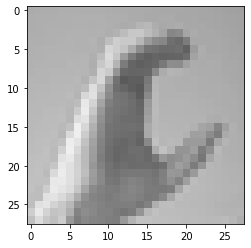

In [4]:
!unzip sign_mnist.zip
plt.imshow(Image.open('/content/sign_mnist/train/2/ABnFIWSPWi.png'))
plt.show()

In [5]:
datasetdir = '/content/sign_mnist'
os.chdir(datasetdir)


In [6]:

batch_size = 64

def generators(shape, preprocessing): 
    '''Create the training and validation datasets for 
    a given image shape.
    '''
    imgdatagen = ImageDataGenerator(
        preprocessing_function = preprocessing,
        horizontal_flip = True, 
        validation_split = 0.2,
    )

    height, width = shape

    train_dataset = imgdatagen.flow_from_directory(
        datasetdir+'/train/',
        target_size = (height, width), 
        class_mode = 'categorical',
        batch_size = batch_size,
        subset='training'
    )

    val_dataset = imgdatagen.flow_from_directory(
        datasetdir+'/train/',
        target_size = (height, width), 
        class_mode = 'categorical',
        batch_size = batch_size,
        subset='validation'
    )
    return train_dataset, val_dataset

In [7]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()

In [8]:
resnet50 = keras.applications.resnet50
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False)
conv_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                          

#ORB OUTPUT

In [10]:
def preprocess_input(img):
  img = np.array(img, dtype=np.uint8)
  query_img_bw = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  orb=cv2.ORB_create()
  queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
  img = cv2.drawKeypoints(img,queryKeypoints,outImage = None,color=(0,255,0), flags=0)
  return resnet50.preprocess_input(img)

#SOBEL OUTPUT

In [11]:
def preprocess_input_using_sobel(img):
  img = np.asarray(img, dtype=np.uint8)
  img_blur = cv2.GaussianBlur(img,(3,3),0)
  sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
  sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
  sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
  return resnet50.preprocess_input(sobelxy)

#SIFT OUTPUT

In [12]:
def preprocess_input_using_sift(img):
  img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
  sift = cv2.xfeatures2d.SIFT_create() # work in :
  kp, des = sift.detectAndCompute(img, None)
  imageKeypoints = cv2.drawKeypoints(img,kp,None)
  return resnet50.preprocess_input(imageKeypoints)

#SURF OUTPUT

In [13]:
def preprocess_input_using_surf(img):
  img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
  surf = cv2.xfeatures2d.SURF_create()
  kp, des = surf.detectAndCompute(img, None)
  imageKeypoints = cv2.drawKeypoints(img,kp,None)
  print()
  plt.imshow(imageKeypoints);
  return resnet50.preprocess_input(imageKeypoints)

#SPACITIAL FILTER

In [117]:
def preprocess_input_using_spacitial(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  m, n,f = img.shape
  img_new = np.zeros([m, n])
  img_final = np.zeros([m,n,f])
  for i in range(0, m-2):
    for j in range(0, n-2):
        temp = np.sum(img[i:i+3,j:j+3]*(1/9))
        img_new[i, j]= temp        
  img_new = img_new.astype(np.uint8)
  img_final[:,:,0]=img_new
  img_final[:,:,1]=img_new
  img_final[:,:,2]=img_new
  return img_final

#GABOR FILTER

In [15]:
def preprocess_input_using_gabor(img):
  g_kernel = cv2.getGaborKernel((21, 21), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)
  filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)
  return filtered_img

#MODEL WITH FILTERS

In [16]:
train_dataset, val_dataset = generators((32, 32), preprocessing=preprocess_input)

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.


In [17]:
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [18]:
# flatten the output of the convolutional part: 
x = keras.layers.Flatten()(conv_model.output)
# hidden layers
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)
# softmax
predictions = keras.layers.Dense(24, activation='softmax')(x)

# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [19]:
for layer in conv_model.layers:
    layer.trainable = False

In [20]:
full_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [23]:
full_model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history = full_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=3,
)
full_model.predict

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/3
344/344 [==============================] - 36s 91ms/step - loss: 0.0060 - acc: 0.9904 - val_loss: 0.0029 - val_acc: 0.9971
Epoch 2/3
344/344 [==============================] - 31s 88ms/step - loss: 0.0019 - acc: 0.9990 - val_loss: 0.0022 - val_acc: 0.9969
Epoch 3/3
344/344 [==============================] - 31s 87ms/step - loss: 0.0013 - acc: 0.9997 - val_loss: 0.0015 - val_acc: 0.9982


<bound method Model.predict of <keras.engine.functional.Functional object at 0x7f71df130c90>>

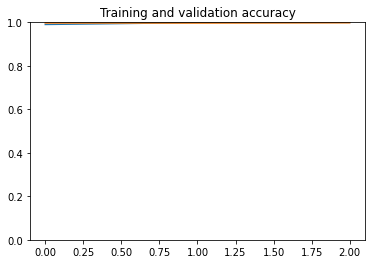

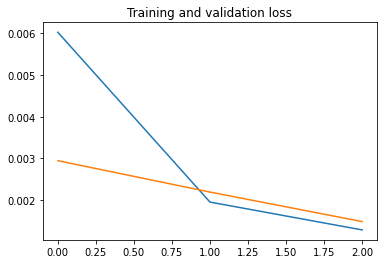

In [24]:
plot_history(history, yrange=(0,1))

In [25]:
full_model.save('/content/model.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [26]:
def predict_class(model, img_path, input_shape, class_indices=None):
    class_indices = {value: key for key, value in class_indices.items()} if class_indices else None
    data = np.expand_dims(preprocess_input(cv2.resize(cv2.imread(img_path), input_shape)), axis=0)
    return class_indices.get(np.argmax(model.predict(data))) if class_indices else model.predict(data)

predict_class(full_model, "/content/sign_mnist/test/15/AktgOSSxjQ.png", (32, 32), class_indices=train_dataset.class_indices)

'22'

#GABOR

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
344/344 [==============================] - 35s 88ms/step - loss: 0.1651 - acc: 0.1902 - val_loss: 0.1417 - val_acc: 0.2697
Epoch 2/10
344/344 [==============================] - 30s 85ms/step - loss: 0.1353 - acc: 0.3091 - val_loss: 0.1298 - val_acc: 0.3467
Epoch 3/10
344/344 [==============================] - 34s 99ms/step - loss: 0.1236 - acc: 0.3863 - val_loss: 0.1171 - val_acc: 0.4251
Epoch 4/10
344/344 [==============================] - 30s 85ms/step - loss: 0.1129 - acc: 0.4483 - val_loss: 0.1118 - val_acc: 0.4532
Epoch 5/10
344/344 [==============================] - 30s 85ms/step - loss: 0.1042 - acc: 0.5051 - val_loss: 0.1029 - val_acc: 0.5191
Epoch 6/10
344/344 [==============================] - 30s 85ms/step - loss: 0.0963 - acc: 0.5541 - val_loss: 0.0978 - val_acc: 0.5484
Epoch 7/10
344/344 [==============================] - 30s 86ms/step - loss: 0.0898 - acc: 0.5909 - val_loss: 0.0902 - val_acc: 0.5780
Epoch 8/10
344/344 [==============================] - 30s 85ms

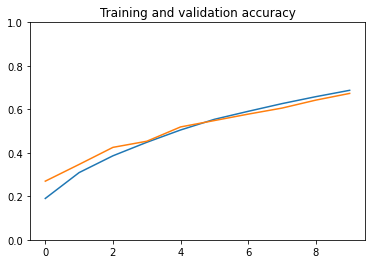

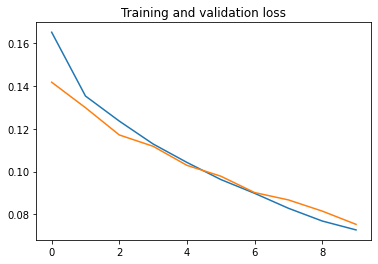

In [27]:
train_dataset, val_dataset = generators((32, 32), preprocessing=preprocess_input_using_gabor)
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# flatten the output of the convolutional part: 
x = keras.layers.Flatten()(conv_model.output)
# hidden layers
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)
# softmax
predictions = keras.layers.Dense(24, activation='softmax')(x)
# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
for layer in conv_model.layers:
    layer.trainable = False
full_model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history = full_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=10,
)
full_model.predict
plot_history(history, yrange=(0,1))

#SIFT

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/3
344/344 [==============================] - 56s 148ms/step - loss: 0.1417 - acc: 0.3465 - val_loss: 0.1060 - val_acc: 0.4988
Epoch 2/3
344/344 [==============================] - 50s 143ms/step - loss: 0.0967 - acc: 0.5402 - val_loss: 0.0890 - val_acc: 0.5847
Epoch 3/3
344/344 [==============================] - 50s 144ms/step - loss: 0.0834 - acc: 0.6133 - val_loss: 0.0791 - val_acc: 0.6276


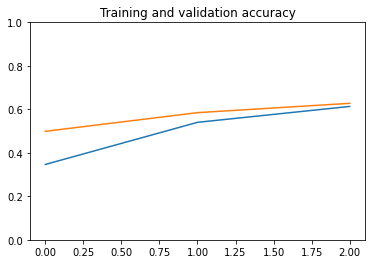

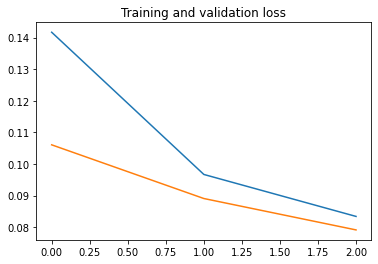

In [28]:
train_dataset, val_dataset = generators((32, 32), preprocessing=preprocess_input_using_sift)
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# flatten the output of the convolutional part: 
x = keras.layers.Flatten()(conv_model.output)
# hidden layers
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)
# softmax
predictions = keras.layers.Dense(24, activation='softmax')(x)
# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
for layer in conv_model.layers:
    layer.trainable = False
full_model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history = full_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=3,
)
full_model.predict
plot_history(history, yrange=(0,1))


#SPACTIAL

In [ ]:
train_dataset, val_dataset = generators((32, 32), preprocessing=preprocess_input_using_spacitial)
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32,3))
# flatten the output of the convolutional part: 
x = keras.layers.Flatten()(conv_model.output)
# hidden layers
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)
# softmax
predictions = keras.layers.Dense(24, activation='softmax')(x)
# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
for layer in conv_model.layers:
    layer.trainable = False
full_model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history = full_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=5,
)
full_model.predict
plot_history(history, yrange=(0,1))


#SOBEL

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/3
344/344 [==============================] - 35s 89ms/step - loss: 0.1450 - acc: 0.3855 - val_loss: 0.0996 - val_acc: 0.5654
Epoch 2/3
344/344 [==============================] - 30s 86ms/step - loss: 0.0836 - acc: 0.6560 - val_loss: 0.0720 - val_acc: 0.7163
Epoch 3/3
344/344 [==============================] - 30s 85ms/step - loss: 0.0629 - acc: 0.7665 - val_loss: 0.0548 - val_acc: 0.8201


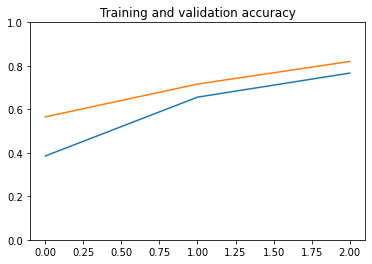

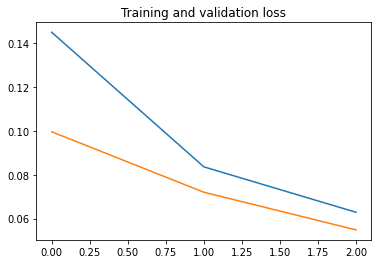

In [31]:
train_dataset, val_dataset = generators((32, 32), preprocessing=preprocess_input_using_sobel)
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# flatten the output of the convolutional part: 
x = keras.layers.Flatten()(conv_model.output)
# hidden layers
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)
# softmax
predictions = keras.layers.Dense(24, activation='softmax')(x)
# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
for layer in conv_model.layers:
    layer.trainable = False
full_model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history = full_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=3,
)
full_model.predict
plot_history(history, yrange=(0,1))

#CONFUSION MATRIX

In [ ]:
path="/content/sign_mnist/test"
dir = os.listdir("/content/sign_mnist/test")
dir
y_predict = []
y_actual =[]
for i in dir:
  pat = path+ '/'+i+'/'
  y_predict.append(i)
  ph = os.listdir(pat)
  for j in ph:
    pa = pat+j
    pro = predict_class(full_model,pa,(32,32),class_indices=val_dataset.class_indices)
    y_actual.append(pro)
    

#CLASSIFICATION REPORT

In [98]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


print(classification_report(y_actual,y_predict))
print(confusion_matrix(y_actual,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         1
          21       0.00      0.00      0.00         0
          22       1.00      1.00      1.00         1
          23       0.00      0.00      0.00         0
          24       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

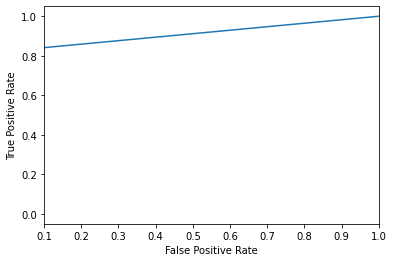

In [64]:
false_positive_rate1, true_positive_rate1,thershold = roc_curve(y1_actual, y1_predict)

plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim(0.1,1)
plt.show()